In [165]:
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics


#Modules related key techniques of supervised learning 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#Modules  to scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler,normalize
from sklearn import preprocessing

#pip install tk  #GUI backend

In [166]:
#importing data
Credit=pd.read_excel('CreditConsumptionData.xlsx')
Behavior=pd.read_excel('CustomerBehaviorData.xlsx')
Demographics=pd.read_excel('CustomerDemographics.xlsx')

In [167]:
#merging data
Customer=Credit.merge(Behavior.merge(Demographics,on='ID'),on='ID')

In [168]:
#Customer[Customer.duplicated()] 
#Customer.isnull().sum()
#Customer.describe()
#Customer.info()
#Customer.shape
#Customer

In [169]:
# dataset(target-null value) segregation
Customer_existing_cc_cons = Customer[Customer.cc_cons.isnull()==0]
##-----------*****-----------
Customer_missing_cc_cons = Customer[Customer.cc_cons.isnull()==1]

In [170]:
#Customer_existing_cc_cons.info()
#Customer_existing_cc_cons.isnull().sum()

In [171]:
# Column segregation
Bincol=['account_type','gender','loan_enq']
Ordcol=['Income']
Numcol=list(set(Customer_existing_cc_cons.columns).difference(set(Bincol).union(set(Ordcol))).difference(['cc_cons']))

In [172]:
# Dummy encoding 
#Nomcol
#new_Customer_existing=pd.get_dummies(Customer_existing_cc_cons, columns =Bincol)
#Ordcol
'''
# Create Y Multinomial variable
dim={'LOW':0,'MEDIUM':1, 'HIGH':2}
new_Customer_existing['Income']=new_Customer_existing['Income'].map(dim)
'''
#one_hot_encoding
new_Customer_existing=pd.get_dummies(Customer_existing_cc_cons, columns = ['Income','account_type','gender','loan_enq'])

In [173]:
new_Customer_existing.shape
#new_Customer_existing.std()

(15000, 53)

In [174]:
###zero-deviation columns droping :
#below columns have no deviation from the average
new_Customer_existing.std()==0
#droping columns
new_Customer_existing = new_Customer_existing.drop(new_Customer_existing.columns[new_Customer_existing.nunique() == 1],axis=1)

In [175]:
new_Customer_existing.columns[new_Customer_existing.isnull().sum()>0]

Index(['cc_count_apr', 'investment_3', 'debit_count_apr', 'emi_active',
       'Avg_days_between_transaction'],
      dtype='object')

In [176]:
#missing value clumns:
#new_Customer_existing.columns[new_Customer_existing.isnull().sum()>0]

#missing value treatment
#new_Customer_existing=new_Customer_existing.fillna(np.median)
new_Customer_existing=new_Customer_existing.dropna()
#droping id
new_Customer_existing=new_Customer_existing.drop(columns=['ID'])

In [177]:
#Below are some of the techniques of detecting outliers
#1.Boxplots
'''
sns.boxplot(new_Customer_existing.cc_cons)
plt.show()
'''
#2.Z-score
'''
outlier = []
def detect_outliers_zscore(data):
    threshold = 3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z = (i-mean)/std
        if z > threshold:
                outlier.append(i)
    return outlier
    
for i in new_Customer_existing.columns:
    l=len(detect_outliers_zscore(new_Customer_existing[i]))
    print(i,":",l)
'''


#3.Inter Quantile Range(IQR)
#create a function to find outliers using IQR
def find_outliers_IQR(df):
   q1=df.quantile(0.25)     
   q3=df.quantile(0.75)      
   IQR=q3-q1                 
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] 
   return outliers
#find_outliers_IQR_count=find_outliers_IQR(new_Customer_existing.cc_cons).count()

#finding outlier except binary value column:['gender_F','gender_M','loan_enq_Y','account_type_saving','account_type_current','Income_HIGH', 'Income_LOW','Income_MEDIUM','NetBanking_Flag']
for i in new_Customer_existing[new_Customer_existing.columns.difference(['gender_F','gender_M','loan_enq_Y','account_type_saving','account_type_current','Income_HIGH', 'Income_LOW','Income_MEDIUM','NetBanking_Flag'])]:
    print("total outlier count for-",i,':',find_outliers_IQR(new_Customer_existing[i]).count())
print("Target(cc_cons)",':',find_outliers_IQR(new_Customer_existing.cc_cons).count())
#print('total',find_outliers_IQR_count/new_Customer_existing.cc_cons.count()*100,'% data outlier from Target variable')

total outlier count for- Avg_days_between_transaction : 0
total outlier count for- Emp_Tenure_Years : 919
total outlier count for- Tenure_with_Bank : 0
total outlier count for- age : 534
total outlier count for- card_lim : 59
total outlier count for- cc_cons : 3133
total outlier count for- cc_cons_apr : 1217
total outlier count for- cc_cons_jun : 1181
total outlier count for- cc_cons_may : 1202
total outlier count for- cc_count_apr : 883
total outlier count for- cc_count_jun : 49
total outlier count for- cc_count_may : 709
total outlier count for- credit_amount_apr : 1229
total outlier count for- credit_amount_jun : 1217
total outlier count for- credit_amount_may : 1173
total outlier count for- credit_count_apr : 58
total outlier count for- credit_count_jun : 2216
total outlier count for- credit_count_may : 2655
total outlier count for- dc_cons_apr : 1220
total outlier count for- dc_cons_jun : 1366
total outlier count for- dc_cons_may : 1248
total outlier count for- dc_count_apr : 434


C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


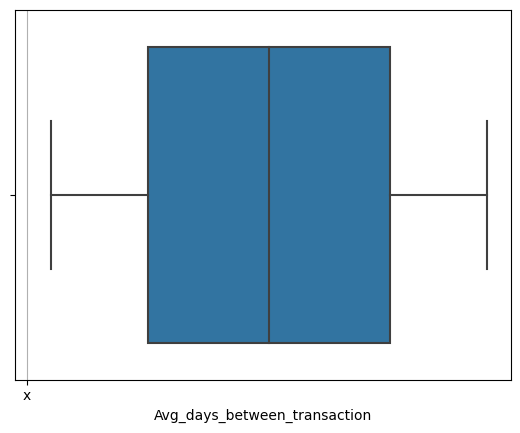

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


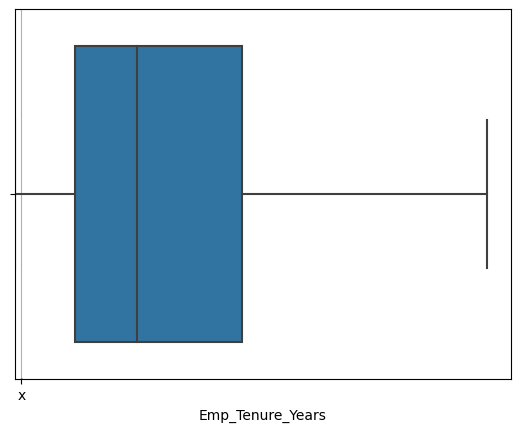

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


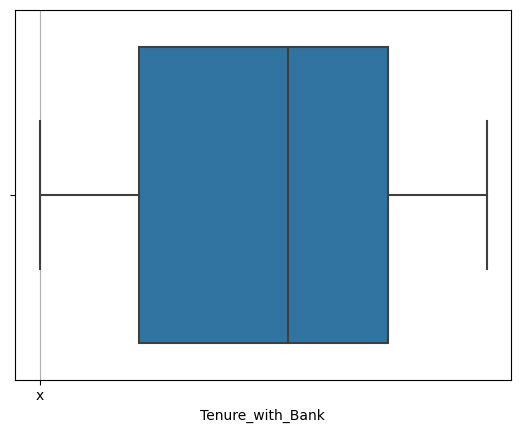

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


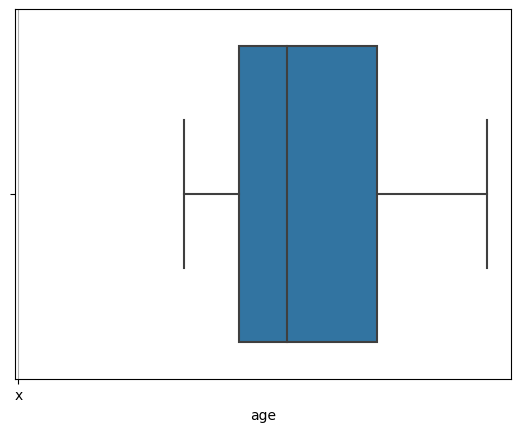

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


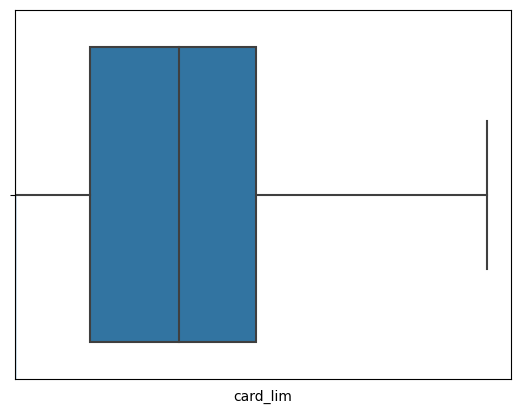

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


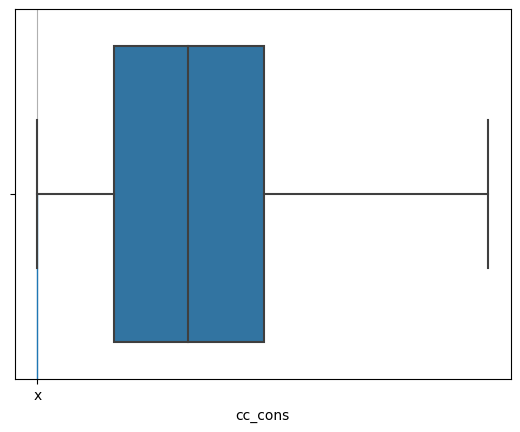

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


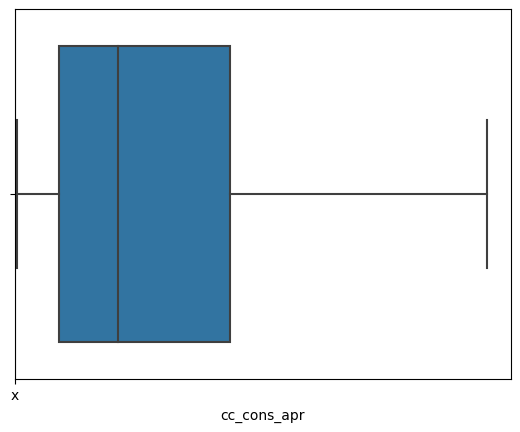

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


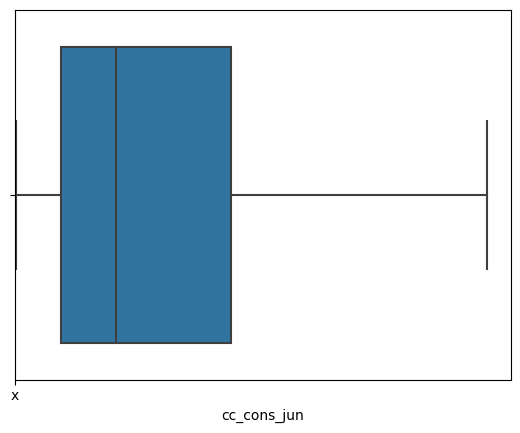

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


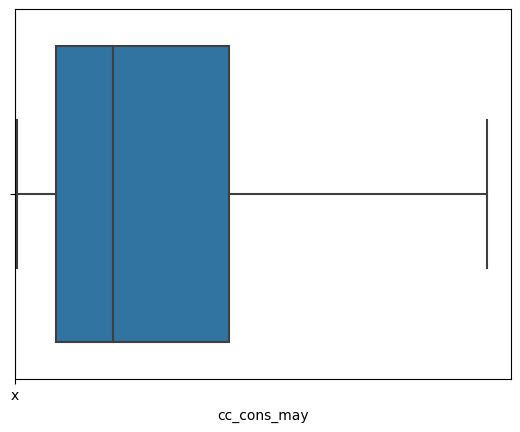

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


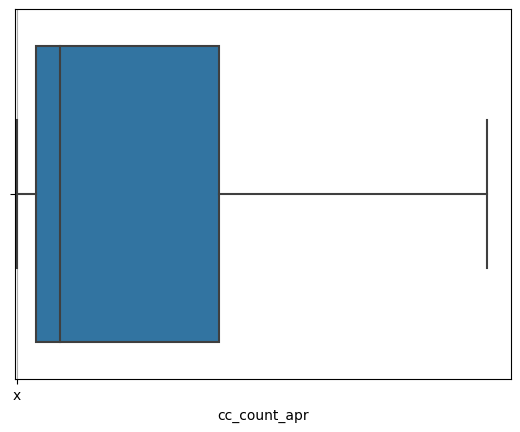

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


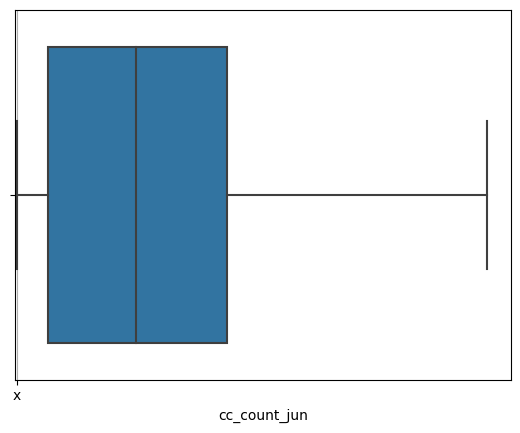

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


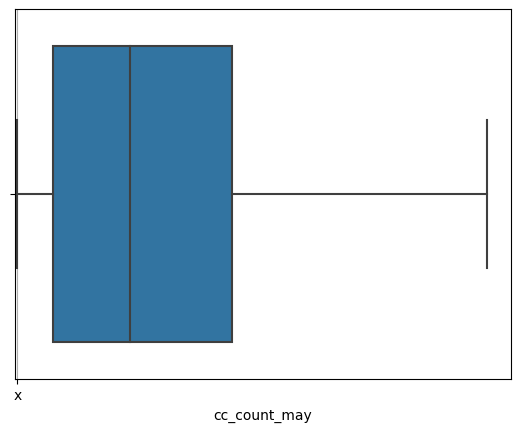

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


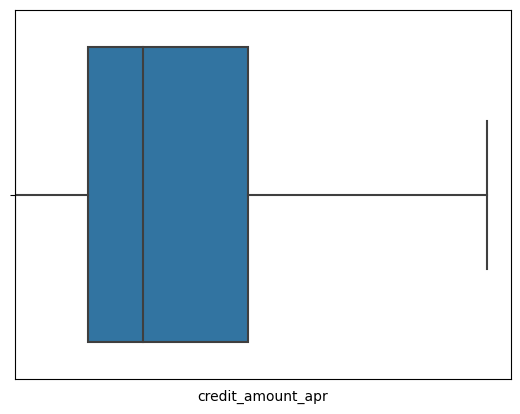

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


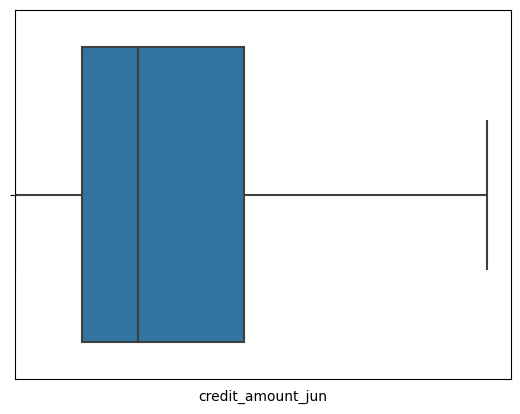

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


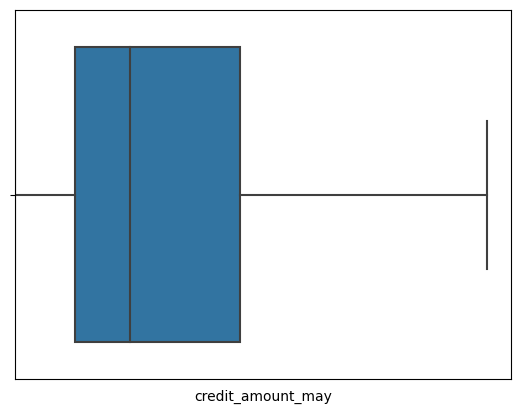

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


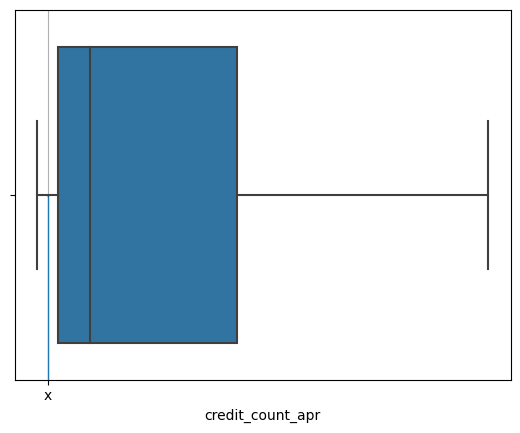

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


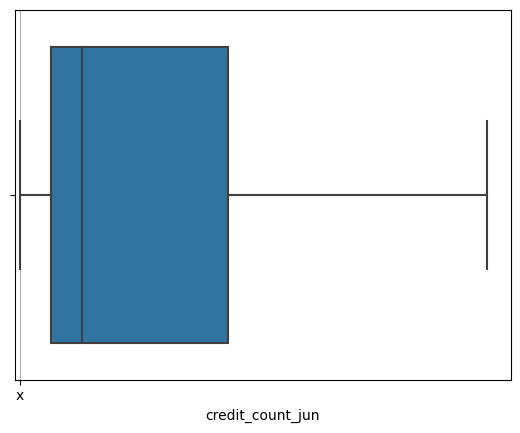

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


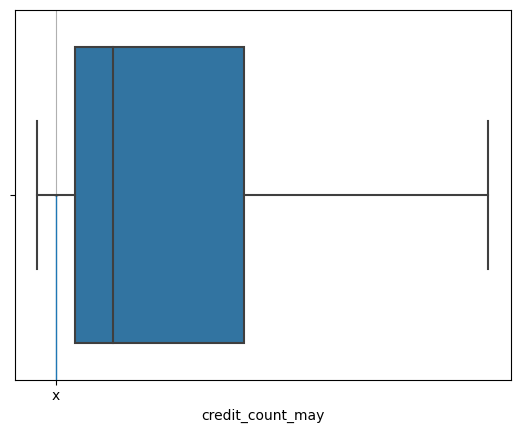

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


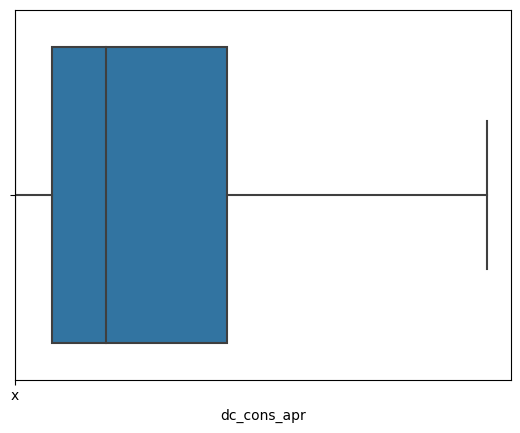

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


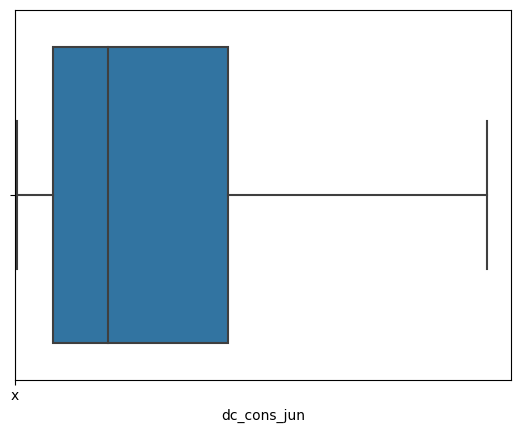

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


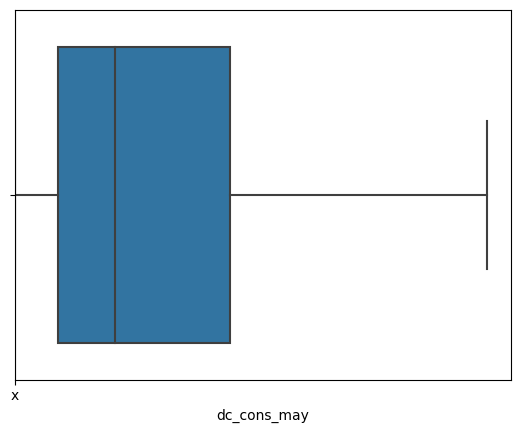

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


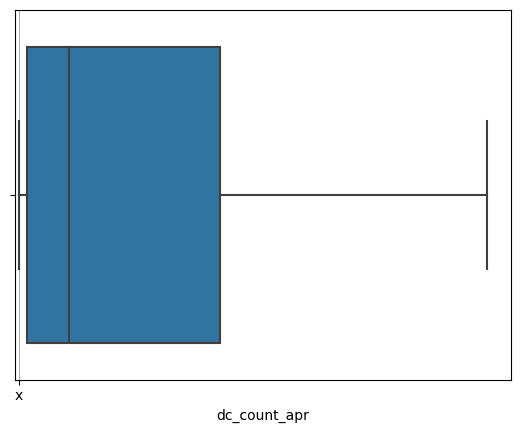

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


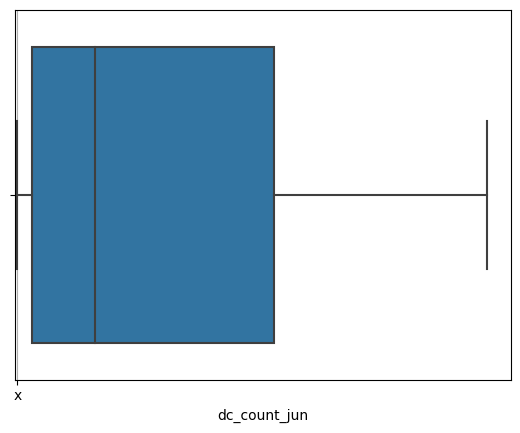

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


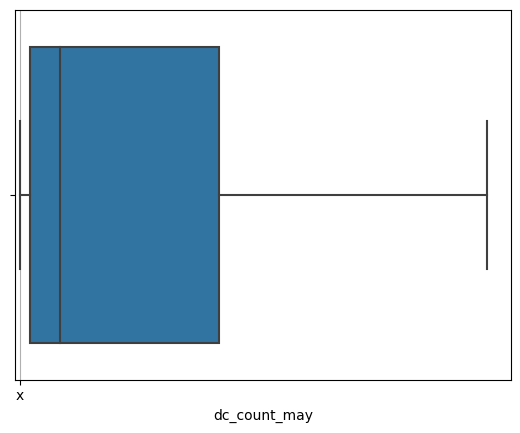

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


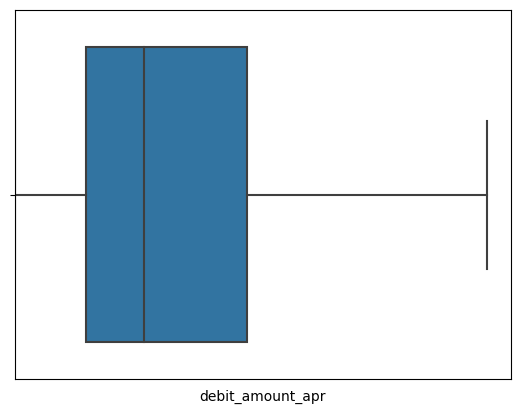

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


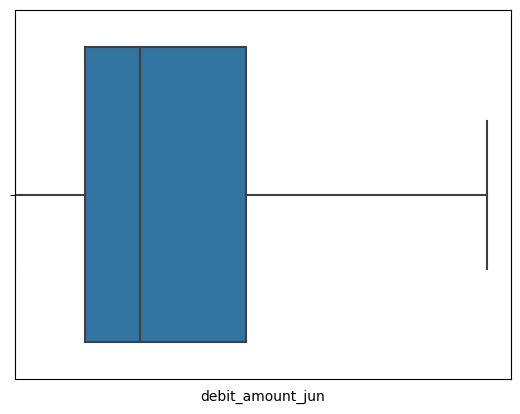

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


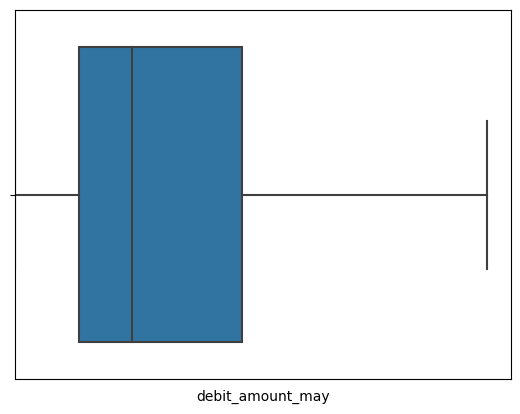

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


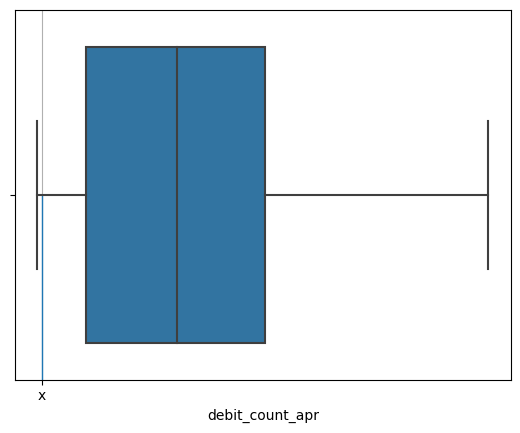

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


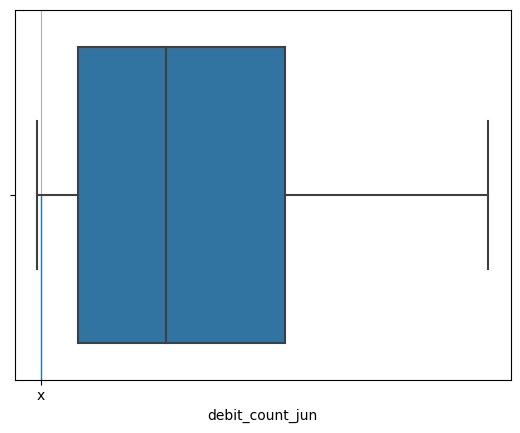

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


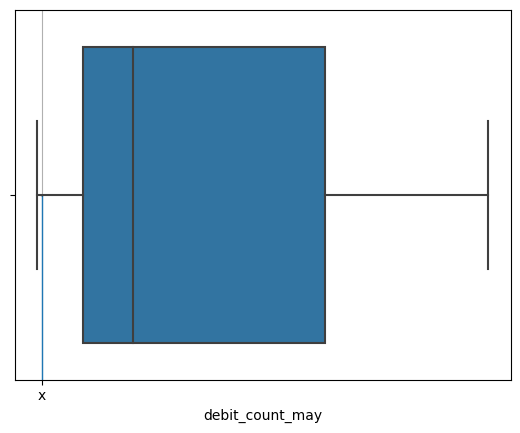

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


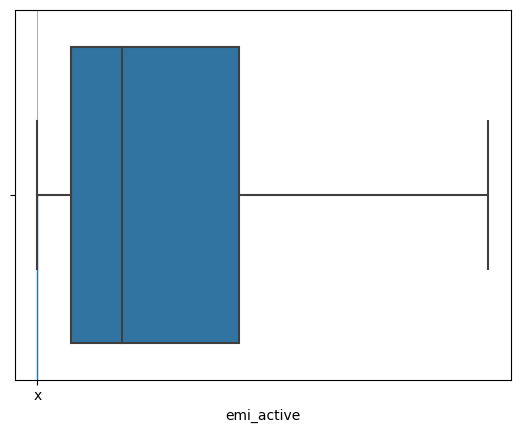

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


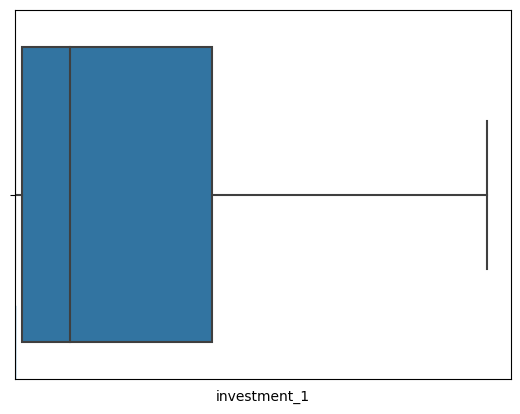

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


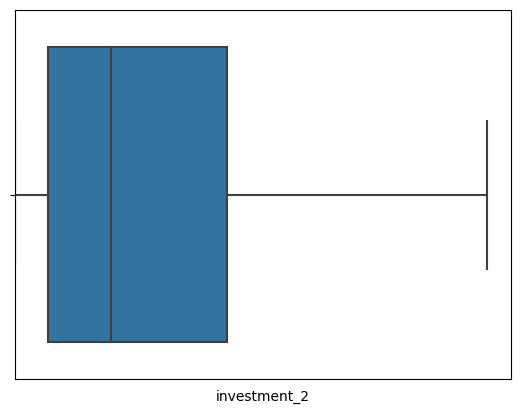

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


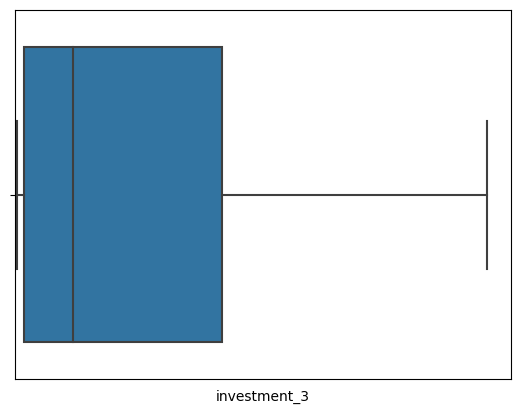

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


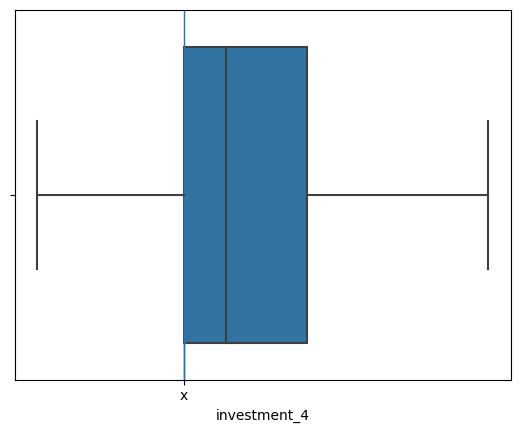

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


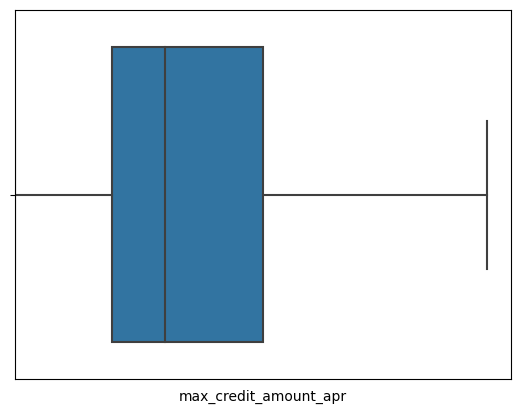

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


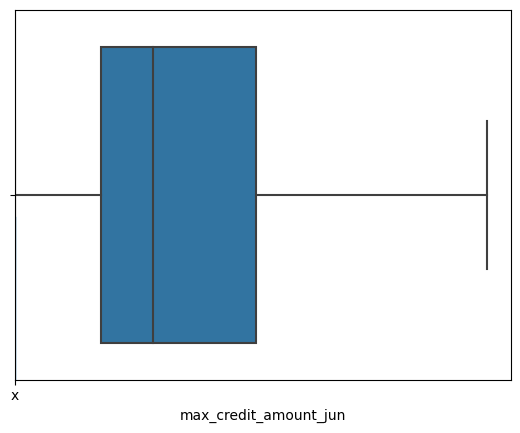

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


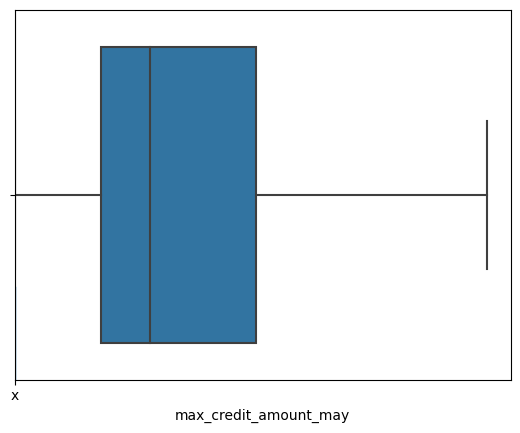

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


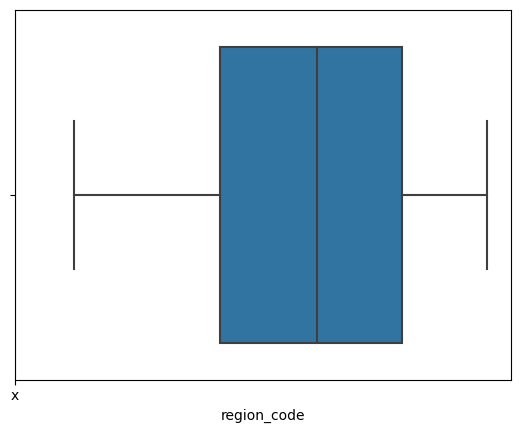

In [178]:
#Below are some of the methods of treating the outliers
#1)Trimming/removing the outlier
# Trimming
'''
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i))
print(a)
'''
# print(len(sample), len(a))
#2)Quantile based flooring and capping
'''
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)
'''

#3)Mean/Median imputation
'''
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)
'''

#  treatment
for i in new_Customer_existing[new_Customer_existing.columns.difference(['gender_F','gender_M','loan_enq_Y','account_type_saving','account_type_current','Income_HIGH', 'Income_LOW','Income_MEDIUM','NetBanking_Flag'])]:
    _, bp = pd.DataFrame.boxplot(new_Customer_existing[i], return_type='both')
    whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
    new_Customer_existing[i].clip(lower=whiskers[0][1],upper=whiskers[1][1],inplace=True)
    sns.boxplot(new_Customer_existing[i])
    plt.show()

In [179]:
new_Customer_existing.head()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,NetBanking_Flag,Avg_days_between_transaction,Income_HIGH,Income_LOW,Income_MEDIUM,account_type_current,account_type_saving,gender_F,gender_M,loan_enq_Y
0,20014.0,24893.00,378.00,10288.00,18033.70,16291.40,11432.00,2.0,26.0,10.0,...,0,17.0,0,0,1,1,0,0,1,1
1,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,...,0,14.0,1,0,0,1,0,0,1,1
2,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,...,1,3.0,0,0,1,1,0,0,1,1
3,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,...,1,4.0,0,0,1,1,0,1,0,1
4,40055.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,...,1,7.0,0,0,1,1,0,0,1,0


In [180]:
#assumption of a linear regression
#1)y(Target) should follow normal Distribution
#2)y&X should have linear relationship
#3)NO outliers
#4)NO missings
#5)NO Multicollinerity

# Scaling Transformation

In [181]:
#There are two ways to go about analyzing the non-normal data.
#Either use the non-parametric tests, which do not assume normality or
#transform the data using an appropriate function,forcing it to fit normal distribution.

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.837, p=0.000
Sample does not look Gaussian (reject H0)


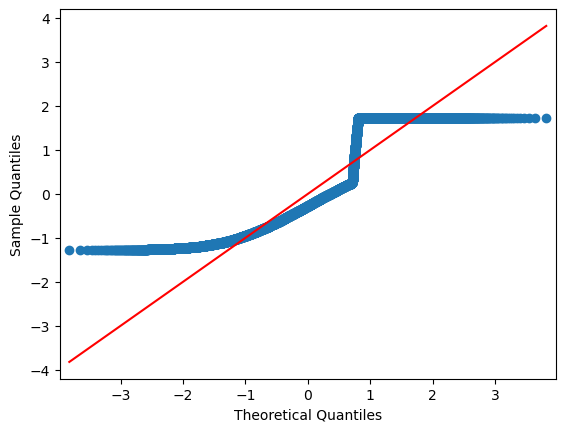

In [182]:
#Kolmogorov–Smirnov test and the Shapiro–Wilk test are most widely used methods to test the normality of the data.
# Shapiro-Wilk Test to check normality 
stat, p = stats.shapiro(new_Customer_existing.cc_cons)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# normality test
    '''    
stat, p = stats.normaltest(new_Customer_existing.cc_cons)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
'''
#
#new_Customer_existing.cc_cons.hist()
qqplot(new_Customer_existing.cc_cons, line='s',fit=True)

#sns.kdeplot(new_Customer_existing.cc_cons)
plt.show()

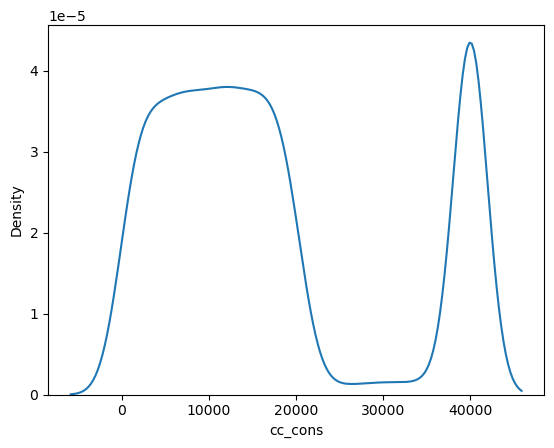

In [183]:
sns.kdeplot(new_Customer_existing.cc_cons)
plt.show()

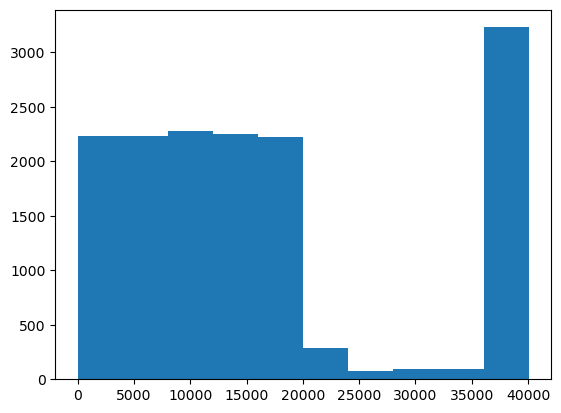

In [184]:
plt.hist(new_Customer_existing.cc_cons)
plt.show()

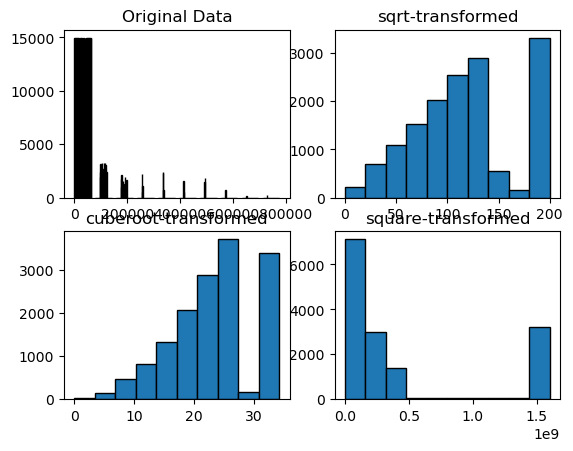

In [185]:
#checking & applying using different transformation on data:
data = new_Customer_existing
#1-create log-transformed data
#data_log = np.log(data)
#2-create sqrt-transformed data
data_sqrt = np.sqrt(data.cc_cons)
#3-create cuberoot-transformed data
data_cbrt = np.cbrt(data.cc_cons)
#4-create square-transformed data
data_sq = np.square(data.cc_cons)
#define grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2)


#create histograms
axs[0,0].hist(data, edgecolor='black')
#axs[4].hist(data_log, edgecolor='black')
axs[0,1].hist(data_sqrt, edgecolor='black')
axs[1,0].hist(data_cbrt, edgecolor='black')
axs[1,1].hist(data_sq, edgecolor='black')
#add title to each histogram
axs[0,0].set_title('Original Data')
#axs[4].set_title('log-transformed')
axs[0,1].set_title('sqrt-transformed')
axs[1,0].set_title('cuberoot-transformed')
axs[1,1].set_title('square-transformed')
plt.show()

In [186]:
DF=data

In [187]:
#Normalization
DF=preprocessing.normalize(DF)
DF=pd.DataFrame(DF,columns=new_Customer_existing.columns)

In [188]:
#Transformation(TARGET)

cc=np.square(DF.cc_cons)
cc_cons=np.cbrt(cc) #Target varibale to transform in bell shape 

cc_cons=pd.Series(cc_cons)

In [189]:
#Transformation(X)
DF1=np.square(DF[DF.columns.difference(['cc_cons'])])
DF1['cc_cons']=cc_cons

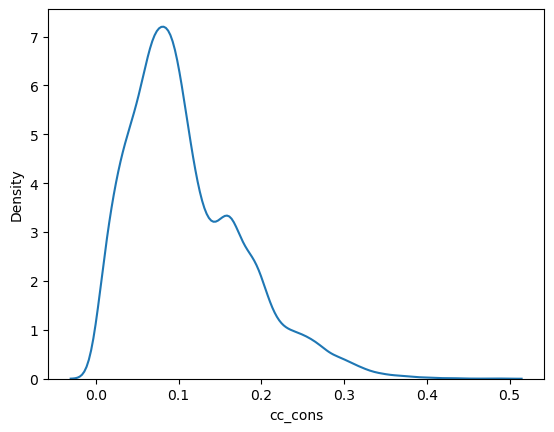

In [190]:
Transf_nor=DF1
sns.kdeplot(Transf_nor.cc_cons)
plt.show()

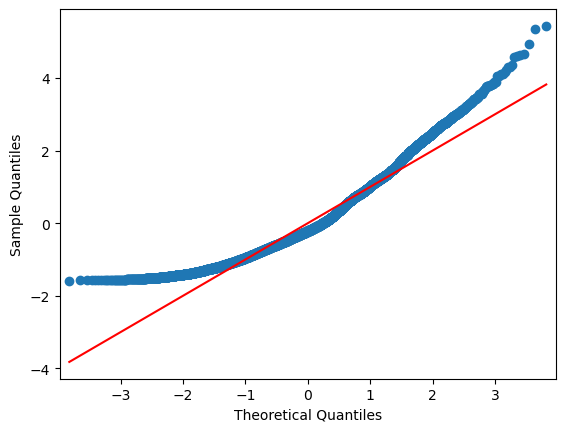

In [191]:
qqplot(Transf_nor.cc_cons,line='s',fit=True)
plt.show()

## analyze whether two population means are different or not

In [192]:
# analyze whether two population means are different or not using z_test/Z_score
Z_score=Transf_nor
Z_score_df = (Z_score - Z_score.mean())/Z_score.std()
Z_score_df.head()

,Avg_days_between_transaction,Emp_Tenure_Years,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,Tenure_with_Bank,account_type_current,account_type_saving,age,...,investment_1,investment_2,investment_3,investment_4,loan_enq_Y,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,region_code,cc_cons
0,0.122026,-0.226461,-0.211335,-0.411336,-0.025283,-0.769016,-0.643445,-0.245451,-0.289829,-0.505011,...,-0.600172,-0.805602,-0.412484,-0.187910,-0.402237,-0.451560,-0.163473,-0.453267,-0.184856,0.145774
1,0.255806,-0.061533,2.560414,-0.411336,-0.706583,-0.769016,-0.012609,0.218320,-0.289829,-0.298194,...,1.111462,0.077136,1.285172,-0.423248,0.056465,1.090673,-0.384987,-0.405553,-0.735276,-0.263783
2,-0.670597,0.003374,-0.211335,-0.411336,-0.195838,-0.279293,-0.646041,-0.407251,-0.289829,-0.259669,...,-0.149286,2.048813,-0.353649,-0.387608,-0.562268,-0.383012,-0.435571,-0.517856,-0.206950,-0.224356
3,-0.611092,-0.420192,-0.211335,-0.411336,0.482988,0.371591,-0.001974,0.236731,-0.289829,-0.447739,...,-0.344436,0.696122,0.082844,-0.237516,0.074674,0.164084,-0.076663,-0.493999,0.754603,-0.480227
4,-0.576358,-0.322907,-0.211335,-0.411336,-0.146173,-0.231673,-0.517334,-0.360136,-0.289829,-0.569509,...,-0.600174,1.295963,0.828146,-0.231473,-1.041501,-0.498804,-0.395932,-0.463323,-0.152650,0.988184


In [193]:
#Null Hypothesis: H0 : μ=μ0  [ the population means are equal]
#Alternative hyphothesis:Ha :μ!=μ0 [ the population means are not equal.]
from statsmodels.stats import weightstats as stests
for i in Transf_nor.columns:
    ztest,propability_value=stests.ztest(Transf_nor[i],alternative='two-sided',)
    print(float(propability_value))
    if propability_value<0.05:
        print(i,": Null hyphothesis rejected , Alternative hyphothesis accepted")
    else:
        print(i,": Null hyphothesis accepted , Alternative hyphothesis rejected")

0.0
Avg_days_between_transaction : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
Emp_Tenure_Years : Null hyphothesis rejected , Alternative hyphothesis accepted
1.1030288786083995e-147
Income_HIGH : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
Income_LOW : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
Income_MEDIUM : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
NetBanking_Flag : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
Tenure_with_Bank : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
account_type_current : Null hyphothesis rejected , Alternative hyphothesis accepted
6.2776573935356666e-276
account_type_saving : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
age : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
card_lim : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
cc_cons_apr : Null hyphothesis rejected , Alterna

# checking distribution(skew):

In [194]:
#checking which distribution(skew) follow:
#Zero skew: mean = median
#Right skew: mean > median
#Left skew: mean < median
for i in Transf_nor.columns:  
    men=Transf_nor[i].mean()
    med=Transf_nor[i].median()
    if men>med:
        print(i,'-','mean:',men,'-','median',med,'-',': Right skew')
    elif men<med:
        print(i,'-','mean:',men,'-','median',med,'-',': Left skew')
    else :
        print(i,'-','mean:',men,'-','median',med,'-',': Zero skew')

Avg_days_between_transaction - mean: 1.0377143016043516e-09 - median 5.506651108318721e-10 - : Right skew
Emp_Tenure_Years - mean: 1.8877430375035816e-09 - median 4.85390470439362e-10 - : Right skew
Income_HIGH - mean: 5.534388552710915e-13 - median 0.0 - : Right skew
Income_LOW - mean: 1.9495770285364525e-12 - median 0.0 - : Right skew
Income_MEDIUM - mean: 4.3829727404094214e-12 - median 2.7547398554566217e-12 - : Right skew
NetBanking_Flag - mean: 4.975027281629494e-12 - median 3.197779385691425e-12 - : Right skew
Tenure_with_Bank - mean: 2.664476247113209e-10 - median 1.3727341630523046e-10 - : Right skew
account_type_current - mean: 5.8310674992437944e-12 - median 3.919050800421449e-12 - : Right skew
account_type_saving - mean: 1.0549211249731564e-12 - median 0.0 - : Right skew
age - mean: 1.4247795709728536e-08 - median 8.456166597464501e-09 - : Right skew
card_lim - mean: 0.3903409793865531 - median 0.3746447719977392 - : Right skew
cc_cons_apr - mean: 0.002900156068985763 - med

In [195]:
#checking skew distribution:
#  A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.
#  A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
# A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
for i, j in zip(Transf_nor.skew(), Transf_nor.columns):
    if i>1 or i<-1:
        print(j,'-','skewness value:',i,'-','highly skewed distribution')
    elif 0.5<i<1 or -0.5<i<-1:
        print(j,'-','skewness value:',i,'-','moderately skewed')
    elif -0.5<i<0.5:
        print(j,'-','skewness value:',i,'-','fairly symmetrical')

Avg_days_between_transaction - skewness value: 0.0 - fairly symmetrical
Emp_Tenure_Years - skewness value: 0.0 - fairly symmetrical
Income_HIGH - skewness value: 0.0 - fairly symmetrical
Income_LOW - skewness value: 0.0 - fairly symmetrical
Income_MEDIUM - skewness value: 0.0 - fairly symmetrical
NetBanking_Flag - skewness value: 0.0 - fairly symmetrical
Tenure_with_Bank - skewness value: 0.0 - fairly symmetrical
account_type_current - skewness value: 0.0 - fairly symmetrical
account_type_saving - skewness value: 0.0 - fairly symmetrical
age - skewness value: 0.0 - fairly symmetrical
card_lim - skewness value: 0.1816181517398183 - fairly symmetrical
cc_cons_apr - skewness value: 6.067801679337324 - highly skewed distribution
cc_cons_jun - skewness value: 6.751737273751782 - highly skewed distribution
cc_cons_may - skewness value: 5.167189324036821 - highly skewed distribution
cc_count_apr - skewness value: 0.0 - fairly symmetrical
cc_count_jun - skewness value: 0.0 - fairly symmetrical

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


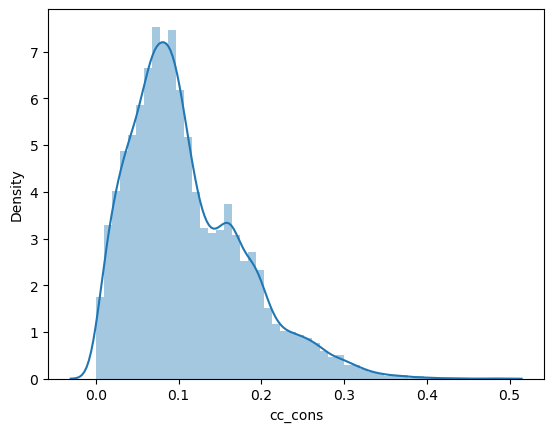

<Figure size 640x480 with 0 Axes>

In [196]:
#check Target variable

sns.distplot(Transf_nor.cc_cons)
fig = plt.figure()
plt.show()

# Detecting Multicollinearity

## VIF

In [197]:
#Detecting Multicollinearity with Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
#X=new_Customer_existing
#one dummy variable should be dropped to avoid being trapped by the dummy variable
X=Transf_nor[Transf_nor.columns.difference(['Income_MEDIUM','account_type_current','gender_M','loan_enq_Y','cc_cons'])]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
print(vif_data)

                         feature       VIF
0   Avg_days_between_transaction  2.352328
1               Emp_Tenure_Years  2.896714
2                    Income_HIGH  1.129054
3                     Income_LOW  1.460170
4                NetBanking_Flag  3.358051
5               Tenure_with_Bank  2.275930
6            account_type_saving  1.197984
7                            age  6.727885
8                       card_lim  1.336887
9                    cc_cons_apr  1.412926
10                   cc_cons_jun  1.407924
11                   cc_cons_may  1.370396
12                  cc_count_apr  1.306953
13                  cc_count_jun  1.537377
14                  cc_count_may  1.434668
15             credit_amount_apr  1.404248
16             credit_amount_jun  1.381588
17             credit_amount_may  1.328699
18              credit_count_apr  1.347180
19              credit_count_jun  1.396650
20              credit_count_may  1.390967
21                   dc_cons_apr  1.389927
22         

In [198]:
vif_data=pd.DataFrame(vif_data)
#vif_data
li=list(vif_data.feature[vif_data.VIF>5])

In [199]:
li
#'Income_HIGH','Income_LOW','Income_MEDIUM','account_type_current','account_type_saving','gender_F','gender_M'

['age']

In [200]:
#Removing multicollinearity:
vif_data=X[X.columns.difference(li)]

In [201]:
vif_data['cc_cons']=Transf_nor.cc_cons

In [202]:
Transf_nors=vif_data
#Transf_nors=Transf_nor

### PCA

In [203]:
from sklearn.decomposition import PCA
model=PCA(n_components = 20).fit(Transf_nor)
X_pc=model.transform(Transf_nor)
# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = Transf_nor.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df[1]

0                  card_lim
1              investment_1
2              investment_1
3         credit_amount_may
4         credit_amount_jun
5                   cc_cons
6          debit_amount_jun
7          debit_amount_apr
8          debit_amount_may
9              investment_3
10             investment_3
11    max_credit_amount_jun
12    max_credit_amount_apr
13              cc_cons_apr
14              cc_cons_may
15              cc_cons_jun
16               emi_active
17              dc_cons_apr
18              dc_cons_may
19              dc_cons_may
Name: 1, dtype: object

# checking corr

In [204]:
#checking corr with target('cc_cons'):

#new_Customer_existing.corr()['cc_cons']
#data.corr()['cc_cons']
#normalized.corr()['cc_cons']
Transf_nors.corr()['cc_cons']
#vif_data.corr()['cc_cons']

Avg_days_between_transaction    0.230959
Emp_Tenure_Years                0.141711
Income_HIGH                     0.084936
Income_LOW                      0.160152
NetBanking_Flag                 0.288068
Tenure_with_Bank                0.230079
account_type_saving             0.112749
card_lim                       -0.143804
cc_cons_apr                     0.152621
cc_cons_jun                     0.158239
cc_cons_may                     0.160680
cc_count_apr                    0.129622
cc_count_jun                    0.172511
cc_count_may                    0.169058
credit_amount_apr               0.133389
credit_amount_jun               0.143439
credit_amount_may               0.109719
credit_count_apr                0.142946
credit_count_jun                0.155774
credit_count_may                0.146116
dc_cons_apr                     0.150426
dc_cons_jun                     0.143467
dc_cons_may                     0.135367
dc_count_apr                    0.155828
dc_count_jun    

In [205]:
x=Transf_nors

#x=pd.DataFrame(x,columns=new_Customer_existing.columns)
#x=vif_data
x.shape

(14997, 43)

# Split the data into train and test data

In [206]:
#assigning x-y(Target)
y = x['cc_cons']
X= x[x.columns.difference(['cc_cons'])]
##Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=50,test_size=0.30) 

# Feature selection

In [207]:
#Feature selection
#https://scikit-learn.org/stable/modules/feature_selection.html
#.1. Removing features with low variance
#.2. Univariate feature selection
#.3. Recursive feature elimination
#.4. Feature selection using SelectFromModel
#.5. Sequential Feature Selection
#.6. Feature selection as part of a pipeline

#There are  types of feature selection method: 
#https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

#A. Filter methods                      -high Faster process/avoids overfitting
#1.Information Gain
#2.Chi-square Test [cat(nom)-cat(nom)]
#3.Fisher’s Score
#4.Correlation Coefficient
#5.Variance Threshold
#6.Mean Absolute Difference (MAD)
#7.Dispersion ratio
#8.ANOVA         [cat(ord/nom)-num]
#9.Pearson correlation

#B. Wrapper methods                     -lower faster process/prone to overfitting
#1.Forward Feature Selection (stepwise selection)
#2.Backward Feature Elimination
#3.Exhaustive Feature Selection
#4.Recursive Feature Elimination

#C. Embedded methods                    -medium fatser process/less prone to overfitting
#1.LASSO Regularization (L1)
#2.Random Forest Importance
#3.Ridge
#4.Decision Tree

#D. Hybrid methods

# Filter methods 

# B. Wrapper methods 

In [208]:
#B. Wrapper methods                                                           *** importing pckg  ***
#1.Forward Feature Selection [/stepwise selection]      from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#2.Backward Feature Elimination                         from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#3.Exhaustive Feature Selection                         from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
#4.Recursive Feature Elimination                        from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

#scoring:
#{'accuracy', 'f1', 'precision', 'recall', 'roc_auc'} for classifiers,
#{'mean_absolute_error', 'mean_squared_error'/'neg_mean_squared_error','median_absolute_error', 'r2'} for regressors


# C. Embedded methods :     

In [209]:
# C. Embedded methods :                               *** importing pckg  ***
#1.LASSO Regularization (L1)                                - from sklearn.linear_model import Lasso,LassoCV
#2.Random Forest Importance                                 -from sklearn.ensemble import RandomForestRegressor
#3.Ridge                                                    -from sklearn.linear_model import Ridge,RidgeCV,ridge_regression
#4.Decision Tree                                            -from sklearn.tree import DecisionTreeRegressor
#ElasticNet                                                 -from sklearn.linear_model import ElasticNet

from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge,RidgeCV,ridge_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

In [210]:


######################################## 1.LASSO Regularization (L1)
#                            (Least Absolute Shrinkage and Selection Operator)

sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=100))
sel_.fit(X_train, y_train)
sel_.get_support()
l=X_train.columns[sel_.get_support()]

####################################### 2.ElasticNet

sel_ = SelectFromModel(ElasticNet(alpha=0.001, random_state=100))
sel_.fit(X_train, y_train)
sel_.get_support()
e=X_train.columns[sel_.get_support()]
######################################### 3.Ridge
sel_ = SelectFromModel(Ridge(alpha=0.001, random_state=100))
sel_.fit(X_train, y_train)
sel_.get_support()
r=X_train.columns[sel_.get_support()]
#(l.union(e)).union(r)
print('lasso\n',l,'\n','ElasticNet\n',e,'\n','Ridge\n',r)

lasso
 Index(['card_lim', 'investment_1', 'investment_2'], dtype='object') 
 ElasticNet
 Index(['card_lim', 'investment_1', 'investment_2'], dtype='object') 
 Ridge
 Index(['card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'emi_active', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may'],
      dtype='object')


In [211]:
#feature importance:

In [212]:
sel_ = SelectFromModel(RandomForestRegressor(criterion='mae',n_estimators=100,n_jobs=-1,random_state=100,bootstrap=True))
sel_.fit(X_train, y_train)
sel_.get_support()
X_train.columns[sel_.get_support()]


C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


Index(['card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'emi_active', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may', 'region_code'],
      dtype='object')

# Building the Model


In [213]:
XX_train=X_train[['card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'emi_active', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may']]
YY_train= y_train

In [214]:
XX_test=X_test[['card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'emi_active', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may']]
YY_test=y_test

In [215]:
#train accuracy metrics
#Mean Squared Error (MSE).
#Root Mean Squared Error (RMSE).
#Mean Absolute Error (MAE)

## LinearRegression

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lreg= LinearRegression()
lreg=lreg.fit(XX_train,YY_train)

#train accuracy metrics:
YY_pred=lreg.predict(XX_train)

print('regression score(r2): ',metrics.r2_score(YY_train, YY_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(metrics. mean_squared_error(YY_train, YY_pred)))
print('Root Mean Square Percentage Error (RMSPE): ',np.sqrt(np.mean(np.square(((YY_train - YY_pred) / YY_train)), axis=0))*100)
print('Mean Squared Error (MSE): ',metrics.mean_squared_error(YY_train, YY_pred))
print('Mean Absolute Error (MAE): ',metrics.mean_absolute_error(YY_train, YY_pred))

regression score(r2):  0.7103824391889699
Root Mean Squared Error (RMSE):  0.03747235717755502
Root Mean Square Percentage Error (RMSPE):  388.5423672435037
Mean Squared Error (MSE):  0.0014041775524422588
Mean Absolute Error (MAE):  0.029694918036336625


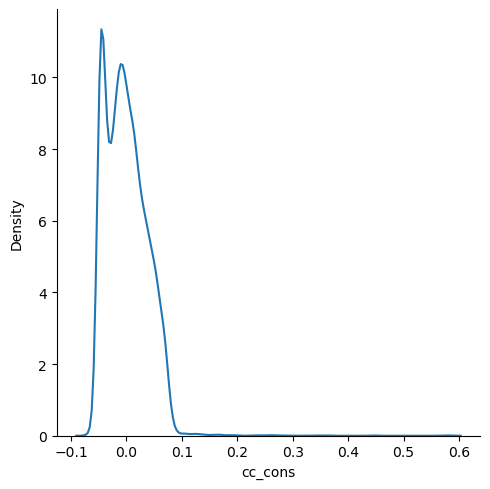

In [217]:
#Error Distribution
sns.displot(YY_pred-YY_train,kind='kde')
plt.show()

In [218]:
#testing accuracy metrics
YY_pred=lreg.predict(XX_test)
from sklearn import metrics
print('regression score(r2): ',metrics.r2_score(YY_test, YY_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(metrics. mean_squared_error(YY_test, YY_pred)))
#print('Root Mean Square Percentage Error (RMSPE): ',np.sqrt(np.mean(np.square(((YY_test - YY_pred) / YY_test)), axis=0))*100)
print('Mean Squared Error (MSE): ',metrics.mean_squared_error(YY_test, YY_pred))
print('Mean Absolute Error (MAE): ',metrics.mean_absolute_error(YY_test, YY_pred))

regression score(r2):  0.7108370319101456
Root Mean Squared Error (RMSE):  0.03636745621119843
Mean Squared Error (MSE):  0.0013225918712734357
Mean Absolute Error (MAE):  0.02959352044421477


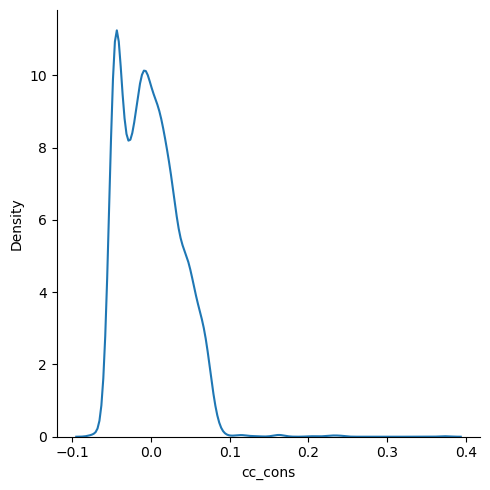

In [219]:
## Error Distribution
sns.displot(YY_pred-YY_test,kind='kde')
plt.show()

In [220]:
from sklearn.model_selection import cross_val_score
#cross_validation training
r=cross_val_score(lreg,XX_train,YY_train,scoring='r2',cv=10)
np.mean(r)

0.7048486239346975

In [221]:
#cross_validation testing
r=cross_val_score(lreg,XX_test,YY_test,scoring='r2',cv=10)
np.mean(r)

0.7091841730293529

## DecisionTreeRegressor

In [222]:
from sklearn.tree import DecisionTreeRegressor

## Random Forest 

In [223]:
from sklearn.ensemble import RandomForestRegressor

In [224]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm
import xgboost
from xgboost import XGBRFRegressor 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


## XGBRFRegressor

## GradientBoostingRegressor

### XGBRegressor

# predicting Target missing value 

In [225]:
Customer_missing_cc_cons

15000   NaN
15001   NaN
15002   NaN
15003   NaN
15004   NaN
         ..
19995   NaN
19996   NaN
19997   NaN
19998   NaN
19999   NaN
Name: cc_cons, Length: 5000, dtype: float64

In [231]:
#1)
# Column segregation
Bincol=['account_type','gender','loan_enq']
Ordcol=['Income']
Numcol=list(set(Customer_missing_cc_cons.columns).difference(set(Bincol).union(set(Ordcol))).difference(['cc_cons']))

In [232]:

#2)
# Dummy encoding 
#Nomcol
#new_Customer_existing=pd.get_dummies(Customer_existing_cc_cons, columns =Bincol)
#Ordcol
'''
# Create Y Multinomial variable
dim={'LOW':0,'MEDIUM':1, 'HIGH':2}
new_Customer_existing['Income']=new_Customer_existing['Income'].map(dim)
'''
#one_hot_encoding
new_Customer_missing_cc_cons=pd.get_dummies(Customer_missing_cc_cons, columns = ['Income','account_type','gender','loan_enq'])


In [233]:

#3)
###zero-deviation columns droping :
#below columns have no deviation from the average
new_Customer_missing_cc_cons.std()==0
#droping columns
new_Customer_missing_cc_cons = new_Customer_missing_cc_cons.drop(new_Customer_missing_cc_cons.columns[new_Customer_missing_cc_cons.nunique() == 1],axis=1)


In [236]:

#4)
#missing value clumns:
#new_Customer_existing.columns[new_Customer_existing.isnull().sum()>0]

#missing value treatment
#droping id,cc_cons
new_Customer_missing_cc_cons=new_Customer_missing_cc_cons.drop(columns=['ID','cc_cons'])

#new_Customer_existing=new_Customer_existing.fillna(np.median)
new_Customer_missing_cc_cons=new_Customer_missing_cc_cons.dropna()



C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


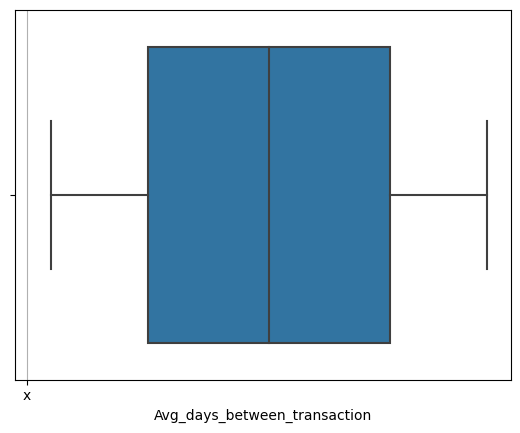

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


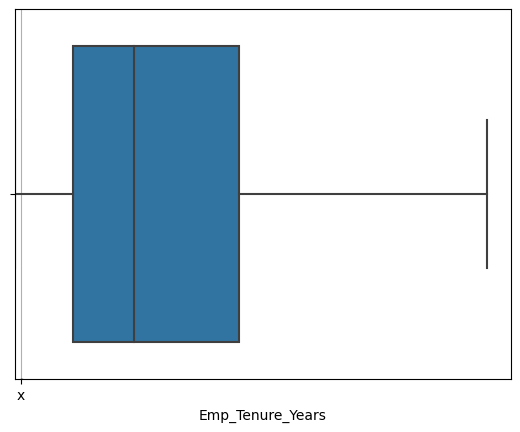

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


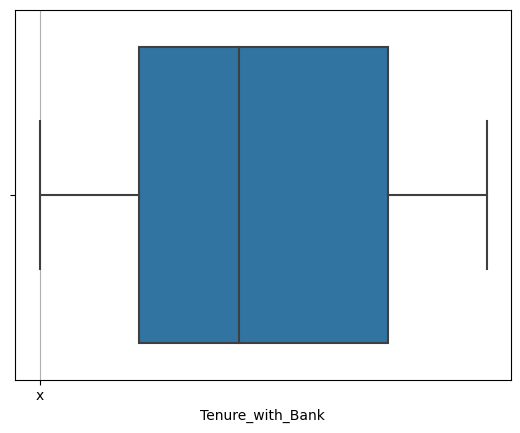

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


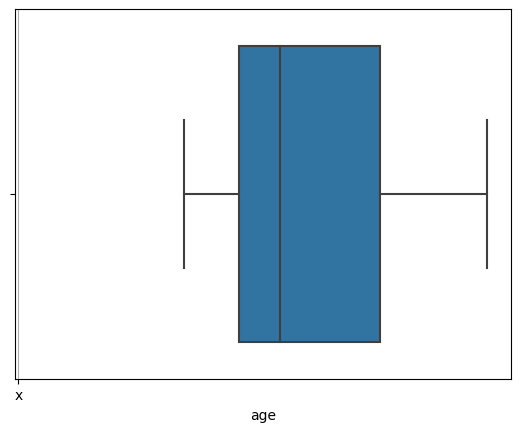

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


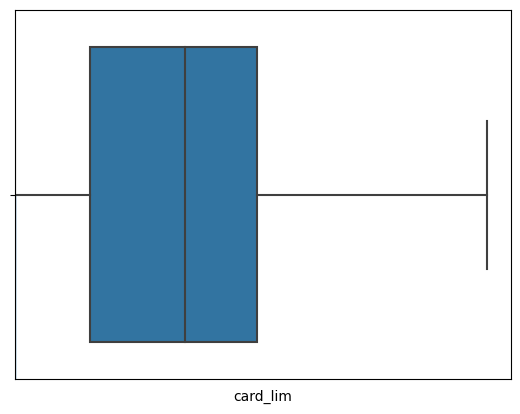

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


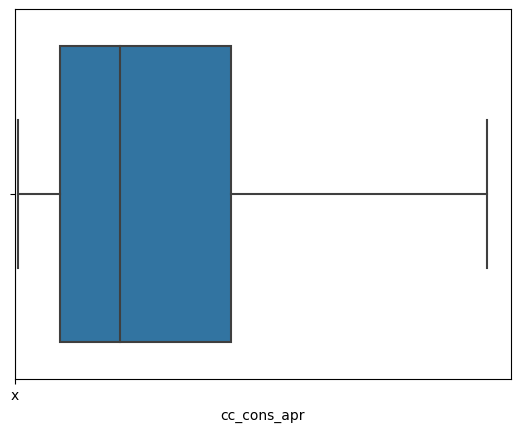

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


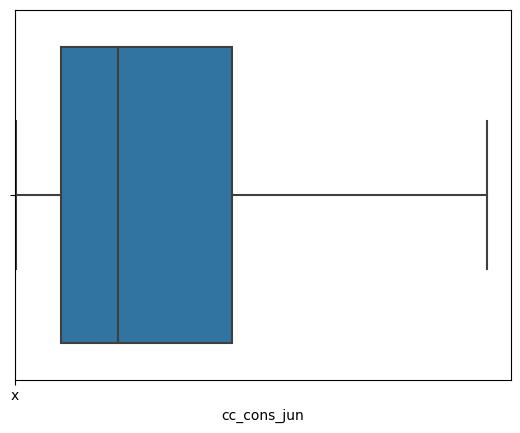

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


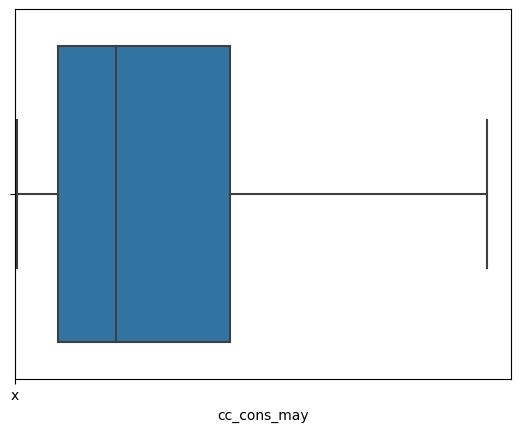

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


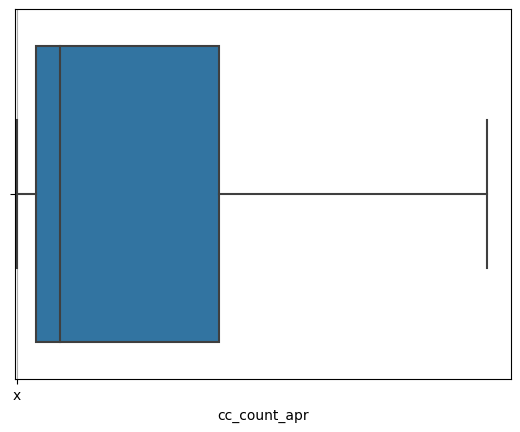

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


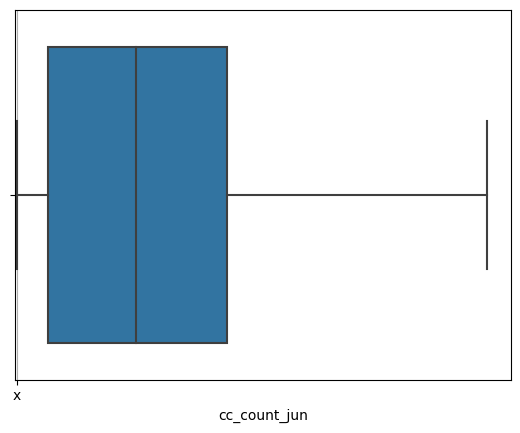

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


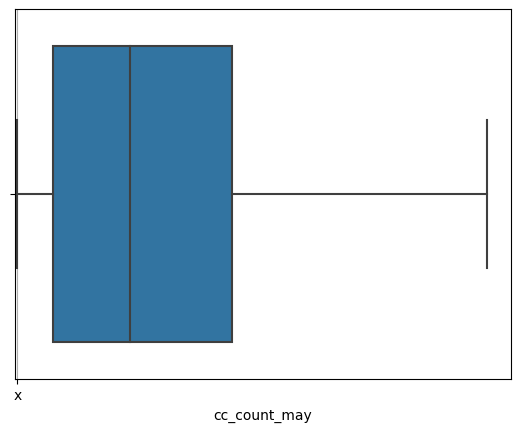

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


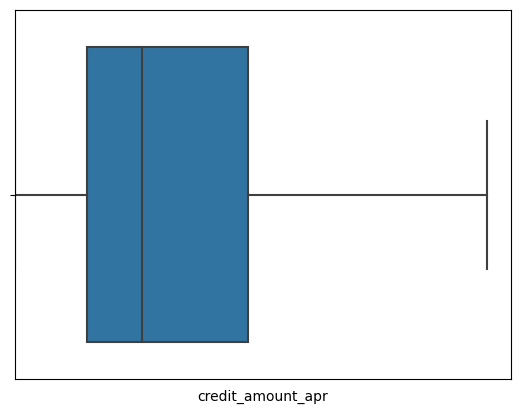

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


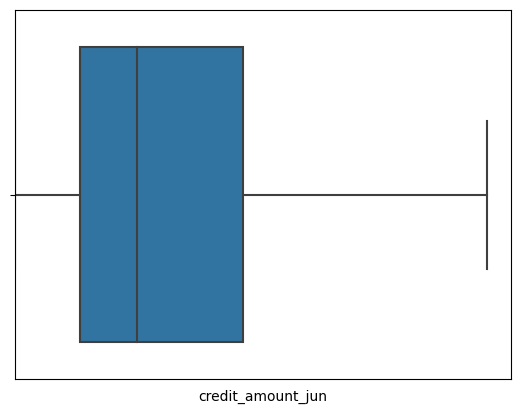

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


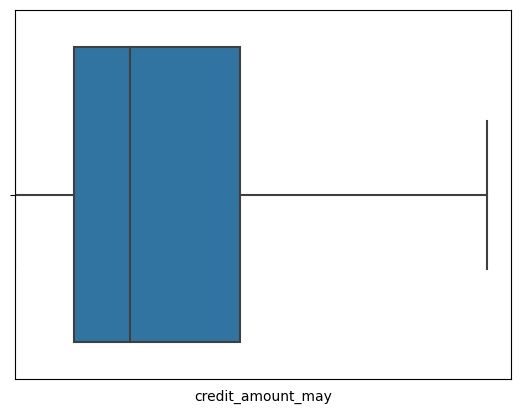

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


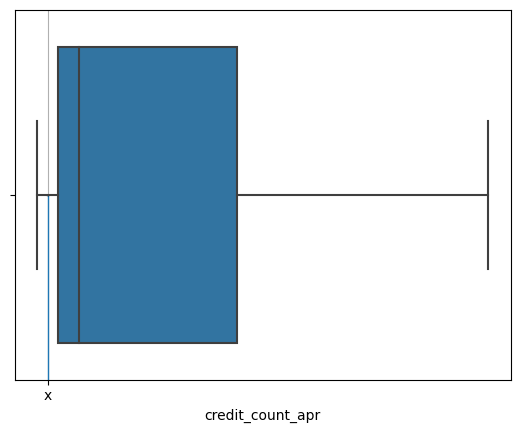

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


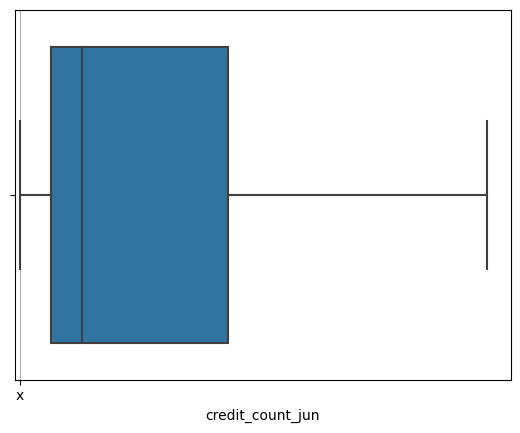

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


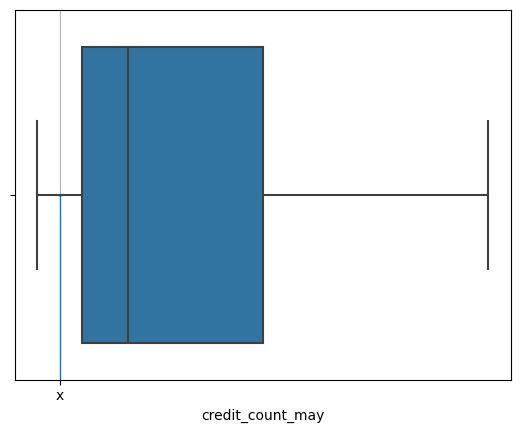

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


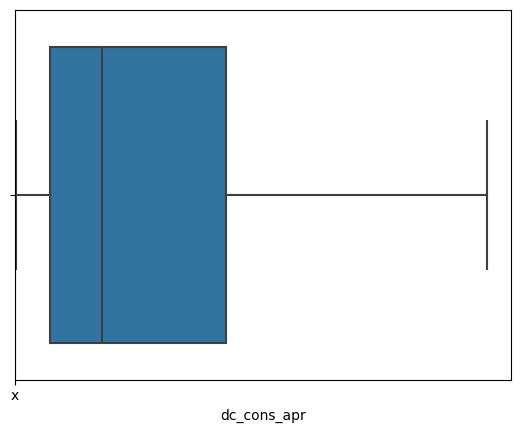

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


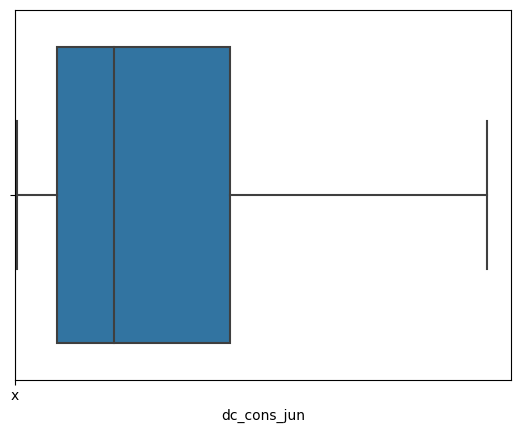

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


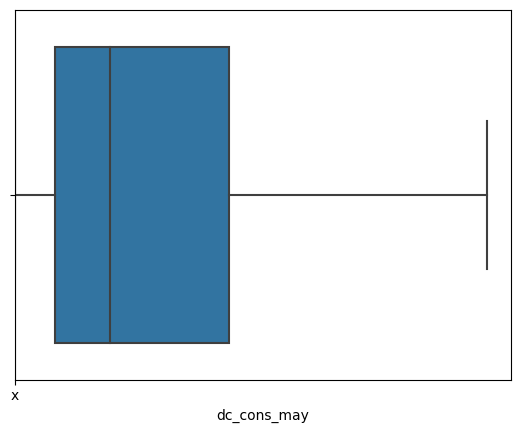

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


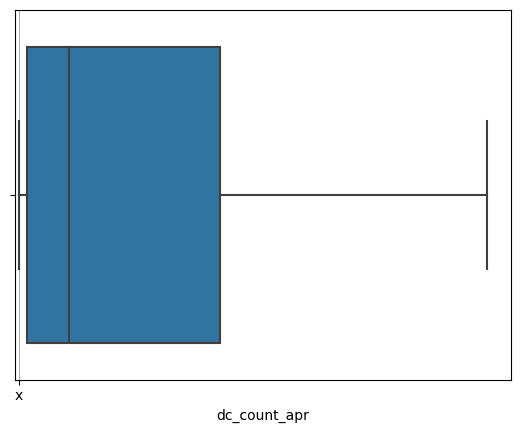

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


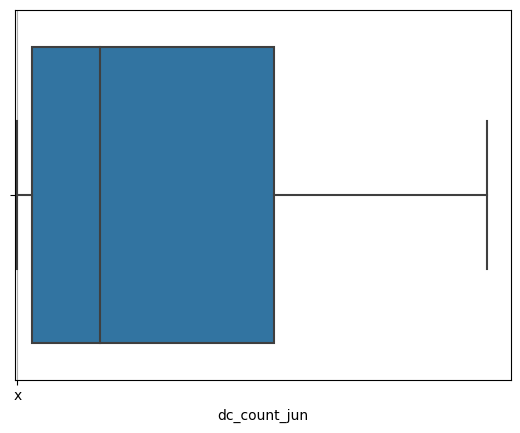

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


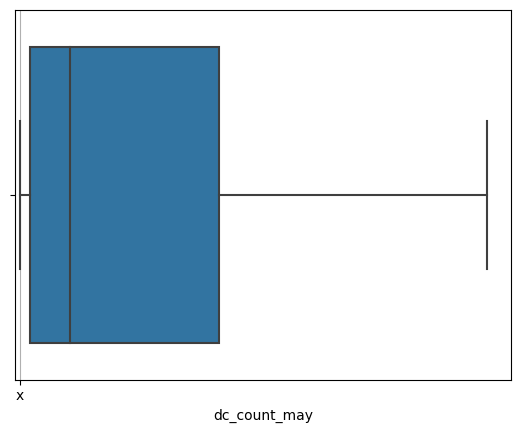

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


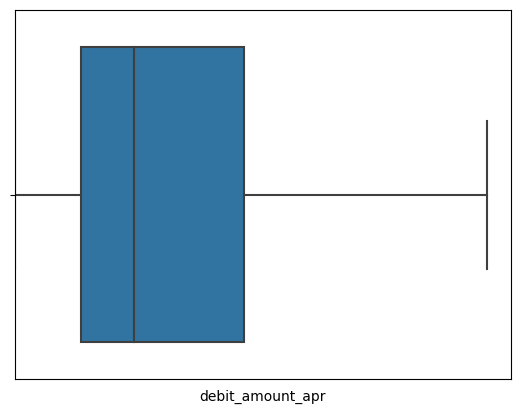

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


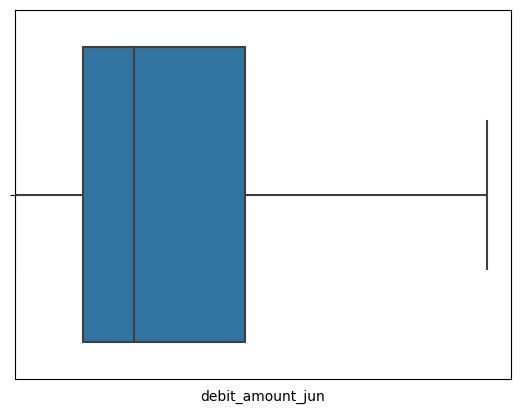

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


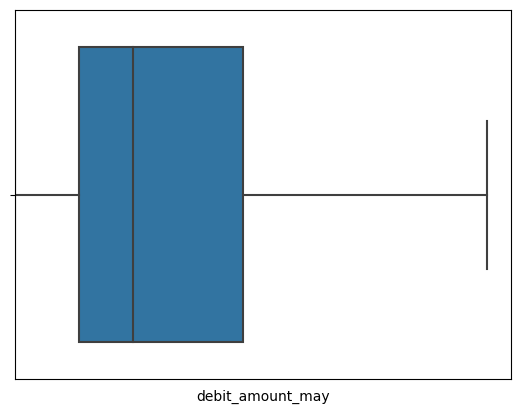

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


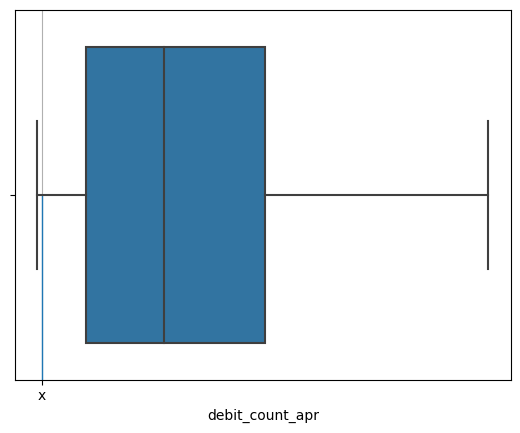

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


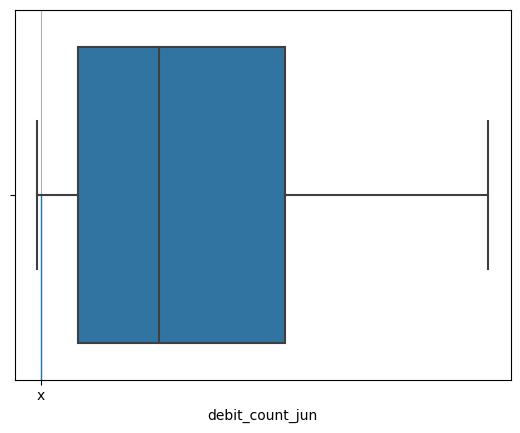

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


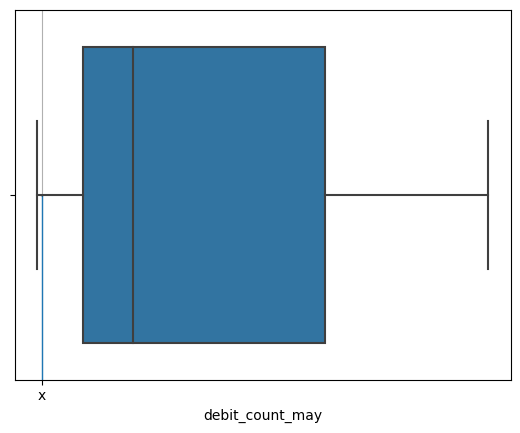

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


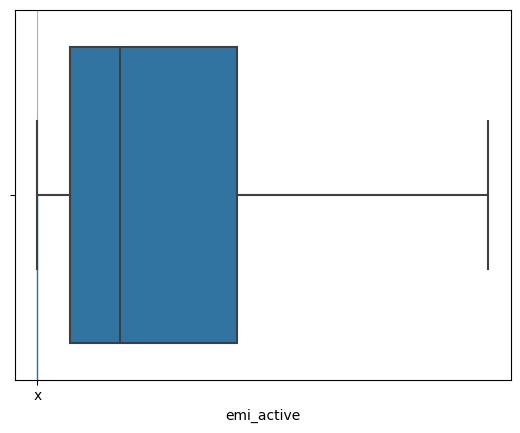

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


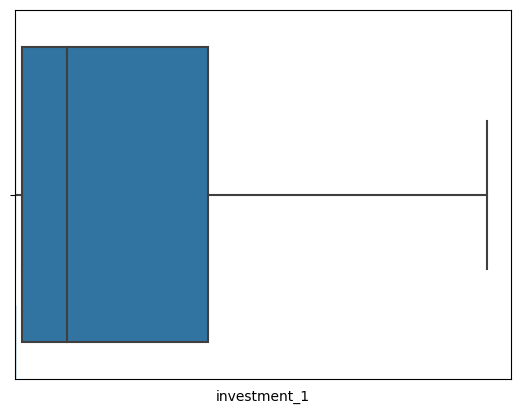

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


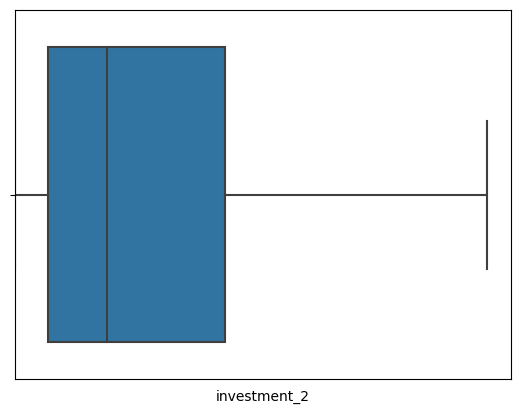

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


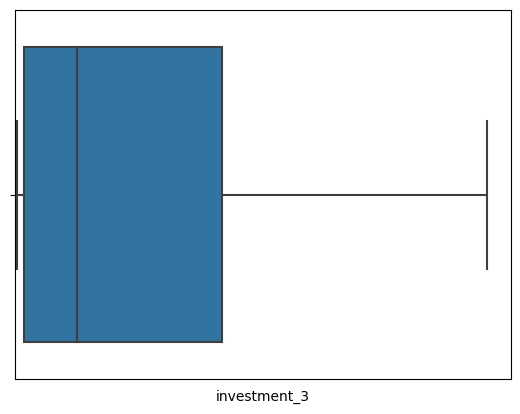

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


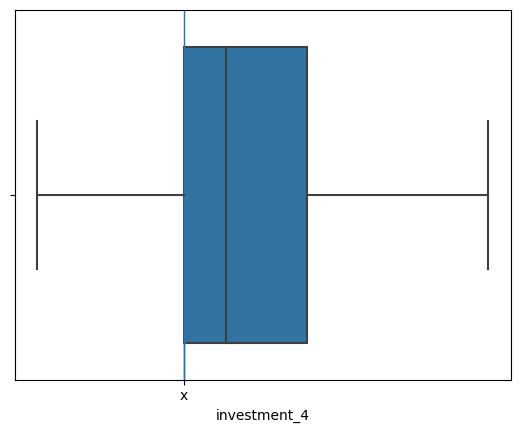

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


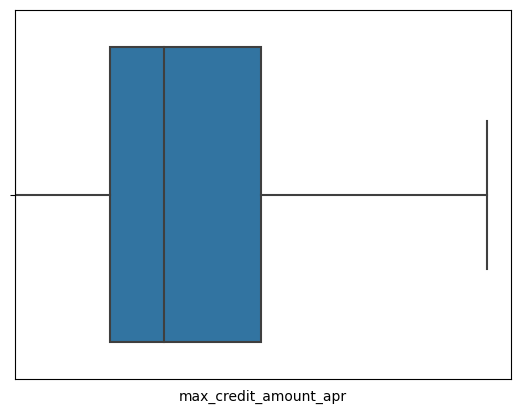

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


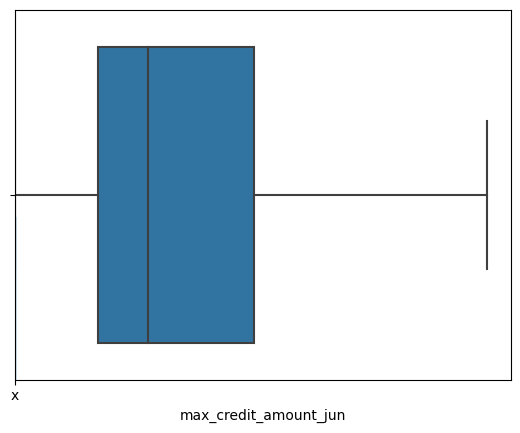

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


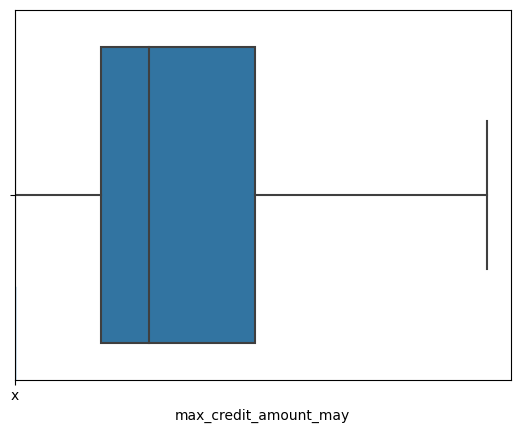

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


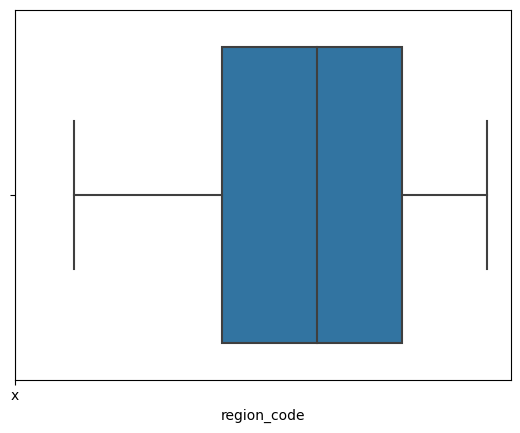

In [238]:
#5)

# outlier treatment
for i in new_Customer_missing_cc_cons[new_Customer_missing_cc_cons.columns.difference(['gender_F','gender_M','loan_enq_Y','account_type_saving','account_type_current','Income_HIGH', 'Income_LOW','Income_MEDIUM','NetBanking_Flag'])]:
    _, bp = pd.DataFrame.boxplot(new_Customer_missing_cc_cons[i], return_type='both')
    whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
    new_Customer_missing_cc_cons[i].clip(lower=whiskers[0][1],upper=whiskers[1][1],inplace=True)
    sns.boxplot(new_Customer_missing_cc_cons[i])
    plt.show()

In [304]:
#6)
DF1=new_Customer_missing_cc_cons

#Normalization
DF2=preprocessing.normalize(DF1)
DF3=pd.DataFrame(DF2,columns=new_Customer_missing_cc_cons.columns)

In [305]:
#8)

DF4=np.square(DF3)

In [306]:
#9)
Transf_missing_cc_cons_nor=DF4

#Detecting Multicollinearity with Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
#X=new_Customer_existing
#one dummy variable should be dropped to avoid being trapped by the dummy variable
X=Transf_missing_cc_cons_nor[Transf_missing_cc_cons_nor.columns.difference(['Income_MEDIUM','account_type_current','gender_M','loan_enq_Y','cc_cons'])]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
print(vif_data)

                         feature       VIF
0   Avg_days_between_transaction  2.516345
1               Emp_Tenure_Years  3.162594
2                    Income_HIGH  1.117102
3                     Income_LOW  1.361028
4                NetBanking_Flag  3.669546
5               Tenure_with_Bank  2.304813
6            account_type_saving  1.130332
7                            age  7.754590
8                       card_lim  1.328763
9                    cc_cons_apr  1.429323
10                   cc_cons_jun  1.426325
11                   cc_cons_may  1.449777
12                  cc_count_apr  1.321487
13                  cc_count_jun  1.624873
14                  cc_count_may  1.570637
15             credit_amount_apr  1.404802
16             credit_amount_jun  1.395461
17             credit_amount_may  1.334486
18              credit_count_apr  1.475745
19              credit_count_jun  1.448343
20              credit_count_may  1.497062
21                   dc_cons_apr  1.441779
22         

In [307]:
#10)

vif_data=pd.DataFrame(vif_data)
#vif_data
li=list(vif_data.feature[vif_data.VIF>5])

#Removing multicollinearity:
vif_data=X[X.columns.difference(li)]

In [308]:
#11)
Transf_missing_cc_cons_nors=vif_data
#Transf_nors=Transf_nor

#12)
Transf_missing_cc_cons_nors

,Avg_days_between_transaction,Emp_Tenure_Years,Income_HIGH,Income_LOW,NetBanking_Flag,Tenure_with_Bank,account_type_saving,card_lim,cc_cons_apr,cc_cons_jun,...,emi_active,gender_F,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,region_code
0,1.540635e-09,8.522238e-10,0.000000e+00,0.000000e+00,6.018105e-12,9.628967e-11,0.0,0.094033,0.000047,0.000503,...,8.245085e-06,0.0,1.146088e-09,8.535354e-01,1.604841e-05,1.965924e-04,0.003608,0.004051,0.000572,1.989736e-06
1,1.410278e-09,2.376767e-10,0.000000e+00,0.000000e+00,0.000000e+00,1.406371e-10,0.0,0.013599,0.003378,0.000468,...,1.056804e-03,0.0,4.055750e-02,8.629649e-01,3.101365e-06,1.139654e-03,0.000044,0.000583,0.001125,6.064428e-07
2,6.415321e-10,3.105016e-09,0.000000e+00,2.851254e-12,2.851254e-12,2.851254e-10,0.0,0.007128,0.000102,0.000001,...,1.960623e-05,0.0,8.122902e-03,8.941532e-01,8.345387e-03,1.864221e-05,0.000637,0.000498,0.003777,2.993132e-07
3,8.835880e-11,1.097092e-10,0.000000e+00,0.000000e+00,1.803241e-12,4.508102e-11,0.0,0.487596,0.000008,0.000033,...,2.094245e-07,0.0,1.499292e-04,3.983359e-01,6.287725e-05,5.383629e-05,0.018202,0.009430,0.017257,2.468637e-07
4,4.208473e-11,7.423747e-10,0.000000e+00,4.676081e-12,4.676081e-12,3.787626e-10,0.0,0.108036,0.000050,0.000053,...,3.698064e-05,0.0,6.991264e-01,4.792767e-08,5.847361e-02,8.296416e-06,0.000982,0.008384,0.003649,1.192518e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,5.731775e-10,4.075929e-09,0.000000e+00,0.000000e+00,0.000000e+00,1.769066e-10,0.0,0.619994,0.000066,0.001025,...,1.258021e-06,0.0,4.363425e-03,4.509357e-02,4.288891e-03,7.376590e-04,0.001244,0.079638,0.005803,6.630631e-06
4991,6.859061e-11,2.551151e-10,0.000000e+00,0.000000e+00,0.000000e+00,1.399808e-12,0.0,0.495567,0.000030,0.001312,...,8.671919e-05,0.0,9.982212e-03,4.389799e-01,3.388432e-07,4.280740e-07,0.001084,0.004715,0.001519,3.828882e-07
4992,1.536755e-11,3.765434e-10,0.000000e+00,0.000000e+00,3.841888e-12,1.882525e-10,0.0,0.000649,0.000096,0.000004,...,5.169807e-05,0.0,5.744051e-01,3.346824e-01,4.052939e-04,1.120780e-03,0.002993,0.002233,0.000301,2.008266e-06
4993,2.388709e-09,1.333235e-08,9.330894e-12,0.000000e+00,9.330894e-12,5.971772e-10,0.0,0.143472,0.000099,0.000159,...,2.771855e-04,0.0,1.243687e-07,3.732939e-01,8.397805e-03,4.423145e-04,0.001984,0.000029,0.011972,6.949361e-06


In [331]:
#13)
Target_X=Transf_missing_cc_cons_nors[['card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'emi_active', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may']]


array([0.07283551, 0.07457062, 0.07567937, ..., 0.0773398 , 0.08545268,
       0.08137945])

In [332]:
YY_pred=lreg.predict(Target_X)
YY_pred

array([0.07283551, 0.07457062, 0.07567937, ..., 0.0773398 , 0.08545268,
       0.08137945])

In [ ]:
#merging dataset

In [344]:
Transf_missing_cc_cons_nors['cc_cons']=YY_pred

In [345]:
Transf_missing_cc_cons_nors['predict']='Predicted'
Transf_nors['predict']='Available'

# Here is Full predicted and avilable data in dataframe

In [366]:
pd.concat([Transf_nors, Transf_missing_cc_cons_nors], axis=0)

,Avg_days_between_transaction,Emp_Tenure_Years,Income_HIGH,Income_LOW,NetBanking_Flag,Tenure_with_Bank,account_type_saving,card_lim,cc_cons_apr,cc_cons_jun,...,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,region_code,cc_cons,predict
0,1.221355e-09,9.508822e-10,0.000000e+00,0.0,0.000000e+00,4.226143e-12,0.0,0.781414,0.002619,0.001122,...,1.487122e-06,0.000007,2.617542e-06,2.003328e-04,0.002704,0.010922,0.002550,2.118413e-06,0.119180,Available
1,1.422684e-09,1.633183e-09,7.258592e-12,0.0,0.000000e+00,2.613093e-10,0.0,0.117997,0.002604,0.000129,...,3.310401e-01,0.216436,5.948253e-02,1.633183e-05,0.047330,0.003916,0.004163,1.098152e-07,0.090904,Available
2,2.851363e-11,1.901701e-09,0.000000e+00,0.0,3.168181e-12,3.168181e-12,0.0,0.126726,0.000102,0.001818,...,8.720521e-02,0.699851,2.063990e-03,4.419684e-05,0.004688,0.002316,0.000366,2.037787e-06,0.093626,Available
3,1.180636e-10,1.494242e-10,0.000000e+00,0.0,7.378975e-12,2.656431e-10,0.0,0.177280,0.006860,0.002265,...,4.946224e-02,0.368199,1.735719e-02,1.615482e-04,0.020518,0.013667,0.001173,5.546694e-06,0.075961,Available
4,1.703364e-10,5.518900e-10,0.000000e+00,0.0,3.476254e-12,5.562006e-11,0.0,0.306637,0.000192,0.000016,...,1.124684e-06,0.515268,4.346996e-02,1.662729e-04,0.001337,0.003569,0.002210,2.235940e-06,0.177341,Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,5.731775e-10,4.075929e-09,0.000000e+00,0.0,0.000000e+00,1.769066e-10,0.0,0.619994,0.000066,0.001025,...,4.363425e-03,0.045094,4.288891e-03,7.376590e-04,0.001244,0.079638,0.005803,6.630631e-06,0.081552,Predicted
4991,6.859061e-11,2.551151e-10,0.000000e+00,0.0,0.000000e+00,1.399808e-12,0.0,0.495567,0.000030,0.001312,...,9.982212e-03,0.438980,3.388432e-07,4.280740e-07,0.001084,0.004715,0.001519,3.828882e-07,0.075984,Predicted
4992,1.536755e-11,3.765434e-10,0.000000e+00,0.0,3.841888e-12,1.882525e-10,0.0,0.000649,0.000096,0.000004,...,5.744051e-01,0.334682,4.052939e-04,1.120780e-03,0.002993,0.002233,0.000301,2.008266e-06,0.077340,Predicted
4993,2.388709e-09,1.333235e-08,9.330894e-12,0.0,9.330894e-12,5.971772e-10,0.0,0.143472,0.000099,0.000159,...,1.243687e-07,0.373294,8.397805e-03,4.423145e-04,0.001984,0.000029,0.011972,6.949361e-06,0.085453,Predicted
